In [1]:
from numpy.random import rand
import numpy as np



n=100000; a=rand(n); n1=np.sum(a<=0.2)
n2=np.sum((a>0.2) & (a<=0.5)); n3=np.sum(a>0.5)
f=np.array([n1,n2,n3])/n; print(f)

[0.20163 0.29841 0.49996]


In [2]:
from numpy.random import rand
import numpy as np


n=10000; a=rand(n);
p=np.array([0.2,0.05,0.01,0.06,0.08,0.1,0.3,0.05,0.03,0.12])
cp=np.cumsum(p); c=[]; c.append(np.sum(a<=cp[0]))
for i in range(1,len(p)):
    c.append(np.sum((a>cp[i-1]) & (a<=cp[i])))
print(c)

[1914, 484, 87, 596, 848, 1019, 3036, 494, 300, 1222]


In [3]:
from numpy.random import uniform
import numpy as np



N=10000000; x=uniform(-1,1,size=N)
y=uniform(-1,1,N); z=uniform(0,1,N)
n=np.sum((x**2+y**2<=1) & (z>=0) & (z<=np.sqrt(1-x**2)))
I=n/N*4; print("I的近似值为：",I)

I的近似值为： 2.6670964


In [4]:
from numpy.random import rand
import numpy as np



N=1000000; x=rand(N); y=rand(N)
n=np.sum(x**2+y**2<1)
s=4*n/N; print(s)

3.14476


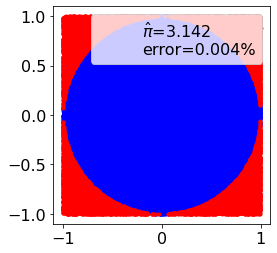

In [11]:
import numpy as np
import matplotlib.pyplot as plt



plt.rc('font',size=16); N=100000;
x,y=np.random.uniform(-1,1,size=(2,N))
inside=(x**2+y**2)<=1
mpi=inside.sum()*4/N  #求pi的近似值
error=abs((mpi-np.pi)/np.pi)*100
outside=np.invert(inside)
plt.plot(x[inside],y[inside],'b.')
plt.plot(x[outside],y[outside],'r.')
plt.plot(0,0,label='$\hat\pi$={:4.3f}\nerror={:4.3f}%'.
         format(mpi,error),alpha=0)
plt.axis('square'); plt.legend(); plt.show()


In [12]:
import numpy as np
from scipy.integrate import dblquad



fxy=lambda x,y: 1/(20000*np.pi)*np.exp(-(x**2+y**2)/20000)
bdy=lambda x: 80*np.sqrt(1-x**2/120**2)
p1=dblquad(fxy,-120,120,lambda x:-bdy(x),bdy)
print("概率的数值解为：",p1)
N=1000000; mu=[0,0]; cov=10000*np.identity(2);
a=np.random.multivariate_normal(mu,cov,size=N)
n=((a[:,0]**2/120**2+a[:,1]**2/80**2)<=1).sum()
p2=n/N; print('概率的近似值为：',p2)

概率的数值解为： (0.37537924340945633, 5.798393432066007e-10)
概率的近似值为： 0.375937


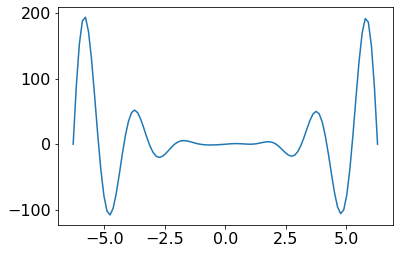

-3.7505026680508093 52.00462222535155 
--------------
Optimization terminated successfully.
         Current function value: -194.906195
         Iterations: 15
         Function evaluations: 30
[-5.81608816] [194.90619465] 
--------------
[5.87419383] 189.89122598898652


In [13]:
import numpy as np
from matplotlib.pyplot import rc, plot, show
from scipy.optimize import fminbound, fmin



rc('font',size=16)
fx=lambda x:(1-x**3)*np.sin(3*x);
x0=np.linspace(-2*np.pi,2*np.pi,100);
y0=fx(x0); plot(x0,y0); show()
xm1=fminbound(lambda x:-fx(x),-2*np.pi,2*np.pi)
ym1=fx(xm1); print(xm1,ym1,'\n--------------')
xm2=fmin(lambda x:-fx(x), -2*np.pi)
ym2=fx(xm2); print(xm2,ym2,'\n--------------')
x=np.random.uniform(-2*np.pi,2*np.pi,100)
y=fx(x); ym=y.max()
xm=x[y==ym]; print(xm,ym)

In [14]:
from scipy.stats import poisson



a=2; b=3; lamda=10; p=1-a/b
u=poisson.ppf(1-a/b,lamda)  #求最佳订购量
p1=poisson.cdf(u-1,lamda)  #p1和p2是为验证最佳购进量
p2=poisson.cdf(u,lamda)
print(u,p1,p,p2)

9.0 0.3328196787507191 0.33333333333333337 0.4579297144718523


In [16]:
import numpy as np




a=2; b=3; lamda=10; M1=0;
u=1; n=10000;
for i in range(1,2*lamda):
    d=np.random.poisson(lamda,n)  #产生n个服从Poiss分布的需求量数据
    M2=np.mean(((b-a)*u*(u<=d)+((b-a)*d-a*(u-d))*(u>d)))  #求平均利润
    if M2>M1:
        M1=M2; u=u+1;
    else:
        print('最佳购进量:',u-1); break


最佳购进量: 9


In [17]:
from numpy.random import exponential, uniform, seed
from numpy import mean, array, zeros




seed(4)  #进行一致性比较,每次运行结果一样


def oneday():
    W=[0]  #第一个顾客的等待时间
    t0=exponential(10); c0=t0
    g0=c0+uniform(4,15); g=g0
    while g<480:
        t=exponential(10)  #下一个到达时间间隔
        c=c0+t  #下一个到达时刻
        w=max(0,g-c)  #下一个等待时间
        g=max(g,c)+uniform(4,15)  #下一个离开时刻
        c0=c  #把当前到达时刻保存起来
        W.append(w)  #把等待时间保存到列表中
    return len(W), mean(W)



W1=oneday(); print("服务人数和平均等待时间分别为：",W1)
d=1000  #模拟的天数
T=zeros(d); N=zeros(d)
for i in range(d):
    N[i],T[i]=oneday()
print("平均服务人数为：",round(N.mean()))
print("平均等待时间为：",T.mean())

服务人数和平均等待时间分别为： (39, 27.715473775462396)
平均服务人数为： 44
平均等待时间为： 25.66246800140869


In [18]:
import numpy as np


N=100000; mu=[0.1, 0.3, 0.1, 0.1, 1.5, 16, 0.75]
cov=np.diag([(0.005/3)**2,0.005**2,(0.005/3)**2,
    (0.01/3)**2, 0.05**2, (0.8/3)**2, 0.0125**2])
a=np.random.multivariate_normal(mu,cov,size=N)
x1,x2,x3,x4,x5,x6,x7 = a.T
y=174.42*x1/x5*(x3/(x2-x1))**0.85*np.sqrt((1-2.62*(1-0.36*\
    (x4/x2)**(-0.56))**(3/2)*(x4/x2)**1.16)/(x6*x7))
d=np.abs(y-1.5)
f=np.sum(9000*(d>=0.3)+1000*((d<0.3)&(d>=0.1)))/N
print("平均损失为：",f)

平均损失为： 2517.66
